In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [4]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude hiding (dot)
import Data.Colour

Draw a group of dots in a triangular array, all with the same color
and backed by a solid-colored triangle to visually group them.  Note
how the dots are laid out by creating a trail called `edge`, rotating
it 60 degrees, and using `decorateTrail` to lay out the rows of dots.



In [5]:
mkTri c n = dots <> (strokeLoop edges # lc c # lw thin # fcA (c `withOpacity` 0.5))
  where rows = map (hcat' (with & sep .~ 1 ))
             . zipWith replicate [n,n-1..1]
             . repeat
             $ dot c
        dots = cat' v (with & sep .~ 3 & catMethod .~ Distrib) rows
        v = rotateBy (1/6) unitX
        edge = fromOffsets . replicate (n-1) $ unitX # scale 3
        edges = glueLine (edge <> rotateBy (1/3) edge <> rotateBy (2/3) edge)

dot c = unitCircle
      # lw none
      # fc c

rowSpc = height (rotateBy (1/6) $ strutY 1 :: D V2 Double)

`row k n s c` draws a row of `k` size-`n` triangles with color `c`,
separated by enough space for `s` dots.



In [6]:
row k n s c = hcat' (with & sep .~ 1 + 3*s) (replicate k (mkTri c n))

The visual proof, which simply consists in assembling various
sub-triangles into a larger triangle, using appropriately transformed
and aligned instances of `row`.



In [8]:
law4 k n c1 c2 = vcat' (with & sep .~ rowSpc) (map tRow [1..k])
  where tRow k = (row k n 0 c1 # centerX # alignT)
                 <>
                 (row (k-1) (n-1) 1 c2 # reflectY # centerX # alignT)

Finally, create a row of diagrams showing the proof at different
sizes.



In [9]:
exampleRow f = hcat' (with & sep .~ 4) . map f --(alignB . f)

law4Dia = exampleRow law4' [2..4]
  where law4' k = law4 k 3 purple gold

example = law4Dia # frame 0.2

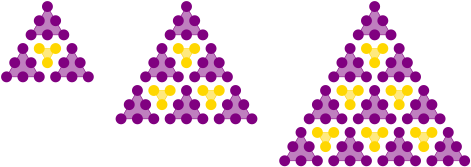

In [10]:
diagram example